In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

main = pd.read_csv('Student Depression Dataset.csv')
main.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [344]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
main = main.drop(['id'], axis=1)

main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [346]:
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [347]:
main['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [348]:
main = main.loc[main['Profession'] == 'Student']

In [349]:
main['Profession'].value_counts()

Profession
Student    27870
Name: count, dtype: int64

In [350]:
main['Work Pressure'].value_counts()

Work Pressure
0.0    27867
5.0        2
2.0        1
Name: count, dtype: int64

In [351]:
main = main.drop(['Work Pressure'], axis=1)
main.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [352]:
main['Age'].value_counts()

Age
24.0    2255
20.0    2237
28.0    2129
29.0    1947
33.0    1892
25.0    1781
21.0    1723
23.0    1641
18.0    1587
19.0    1560
34.0    1467
27.0    1461
31.0    1425
32.0    1258
22.0    1159
26.0    1154
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [353]:
main = main.loc[main['Age'] <= 49]
main['Age'].value_counts()

Age
24.0    2255
20.0    2237
28.0    2129
29.0    1947
33.0    1892
25.0    1781
21.0    1723
23.0    1641
18.0    1587
19.0    1560
34.0    1467
27.0    1461
31.0    1425
32.0    1258
22.0    1159
26.0    1154
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
43.0       2
46.0       2
37.0       2
49.0       1
44.0       1
41.0       1
Name: count, dtype: int64

In [354]:
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    7448
5.0    6285
4.0    5149
1.0    4799
2.0    4175
0.0       9
Name: count, dtype: int64

In [355]:
main = main.loc[main['Academic Pressure'] > 0]
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    7448
5.0    6285
4.0    5149
1.0    4799
2.0    4175
Name: count, dtype: int64

In [356]:
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6350
2.0    5833
3.0    5810
1.0    5444
5.0    4416
0.0       3
Name: count, dtype: int64

In [357]:
main = main.loc[main['Study Satisfaction'] > 0]
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6350
2.0    5833
3.0    5810
1.0    5444
5.0    4416
Name: count, dtype: int64

In [358]:
main.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [359]:
main = main.drop(['Job Satisfaction'], axis=1)
main.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [360]:
main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8296
7-8 hours            7334
5-6 hours            6173
More than 8 hours    6032
Name: count, dtype: int64

In [361]:
main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    8296
1    7334
2    6173
3    6032
Name: count, dtype: int64

In [362]:
main['Dietary Habits'].value_counts()
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10294
Moderate      9895
Healthy       7634
Name: count, dtype: int64

In [363]:
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
0    10294
1     9895
2     7634
Name: count, dtype: int64

In [364]:
main['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [365]:
main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']
main['New_Degree'].value_counts()

New_Degree
Graduated           12604
Post Graduated       7144
Higher Secondary     6068
Name: count, dtype: int64

In [366]:
main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
main['New_Degree'].value_counts()

New_Degree
0    12604
1     7144
2     6068
Name: count, dtype: int64

In [367]:
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    17578
No     10210
Name: count, dtype: int64

In [368]:
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    17578
0    10210
Name: count, dtype: int64

In [369]:
main['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    4221
12.0    3159
11.0    2886
8.0     2503
6.0     2244
9.0     2020
7.0     1996
0.0     1692
4.0     1603
2.0     1577
3.0     1460
5.0     1285
1.0     1142
Name: count, dtype: int64

In [370]:
main['Financial Stress'].value_counts()

Financial Stress
5.0    6682
4.0    5752
3.0    5201
1.0    5098
2.0    5052
Name: count, dtype: int64

In [371]:
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14338
Yes    13450
Name: count, dtype: int64

In [372]:
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    14338
1    13450
Name: count, dtype: int64

In [373]:
main.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,0,33.0,Visakhapatnam,Student,5.0,8.97,2.0,2,2,B.Pharm,1,3.0,1.0,0,1,0
1,1,24.0,Bangalore,Student,2.0,5.90,5.0,2,1,BSc,0,3.0,2.0,1,0,0
2,0,31.0,Srinagar,Student,3.0,7.03,5.0,0,2,BA,0,9.0,1.0,1,0,0
3,1,28.0,Varanasi,Student,3.0,5.59,2.0,1,1,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,Student,4.0,8.13,3.0,2,1,M.Tech,1,1.0,1.0,0,0,1


In [374]:
main.isnull().sum()
main = main.dropna()

main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,0,33.0,5.0,8.97,2.0,2,2,1,3.0,1.0,0,1,0
1,1,24.0,2.0,5.90,5.0,2,1,0,3.0,2.0,1,0,0
2,0,31.0,3.0,7.03,5.0,0,2,0,9.0,1.0,1,0,0
3,1,28.0,3.0,5.59,2.0,1,1,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,2,1,1,1.0,1.0,0,0,1


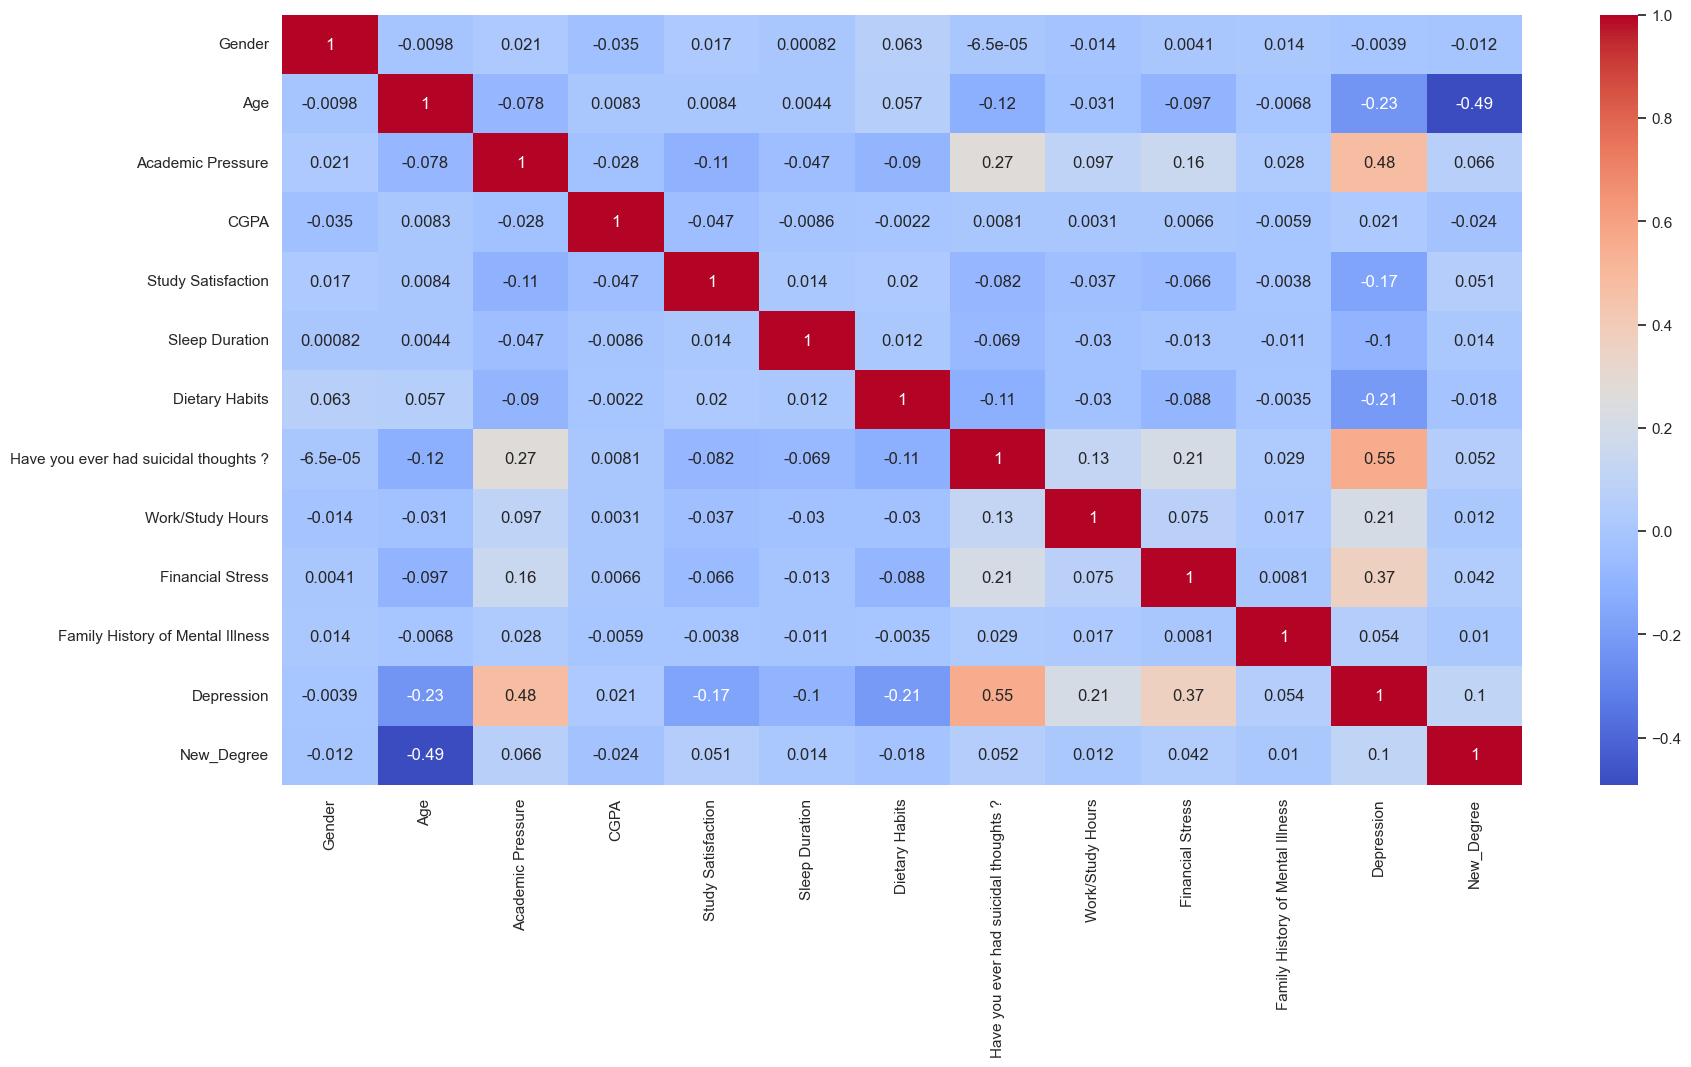

In [375]:
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [376]:
encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(main[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))

encoded_df.index = main.index
main_encoded = pd.concat([main, encoded_df], axis=1)

main_encoded.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_3.0', 'City_Agra', 'City_Ahmedabad',
       'City_Bangalore', 'City_Bhavna', 'City_Bhopal', 'City_Chennai',
       'City_City', 'City_Delhi', 'City_Faridabad', 'City_Gaurav',
       'City_Ghaziabad', 'City_Harsh', 'City_Harsha', 'City_Hyderabad',
       'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur',
       'City_Kibara', 'City_Kolkata', 'City_Less Delhi',
       'City_Less than 5 Kalyan', 'City_Lucknow', 'City_Ludhiana',
       'City_M.Com', 'City_M.Tech', 'City_ME', 'City_Meerut', 'City_Mihir',
       'City_Mira', 'City_Mumbai', 'City_Nagpur', 'City_Nalini', 'City_Nalyan',
       'City_Nandini', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
    

In [377]:
main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)

In [378]:
main.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,0,33.0,Visakhapatnam,Student,5.0,8.97,2.0,2,2,B.Pharm,1,3.0,1.0,0,1,0
1,1,24.0,Bangalore,Student,2.0,5.90,5.0,2,1,BSc,0,3.0,2.0,1,0,0
2,0,31.0,Srinagar,Student,3.0,7.03,5.0,0,2,BA,0,9.0,1.0,1,0,0
3,1,28.0,Varanasi,Student,3.0,5.59,2.0,1,1,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,Student,4.0,8.13,3.0,2,1,M.Tech,1,1.0,1.0,0,0,1


In [379]:
print(main.dtypes)
print(main.head()) 

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
New_Degree                                object
dtype: object
  Gender   Age           City Profession  Academic Pressure  CGPA  \
0      0  33.0  Visakhapatnam    Student                5.0  8.97   
1      1  24.0      Bangalore    Student                2.0  5.9

In [380]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
main['Family History of Mental Illness'] = label_encoder.fit_transform(main['Family History of Mental Illness'])

main = pd.get_dummies(main, columns=['City', 'Profession', 'Degree', 'New_Degree'], drop_first=True)


In [381]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
main_scaled = scaler.fit_transform(main) 


In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(main_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [383]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(main, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [384]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  # Define the model
model.fit(X_train_scaled, y_train)  # Train the model


LogisticRegression()

In [385]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


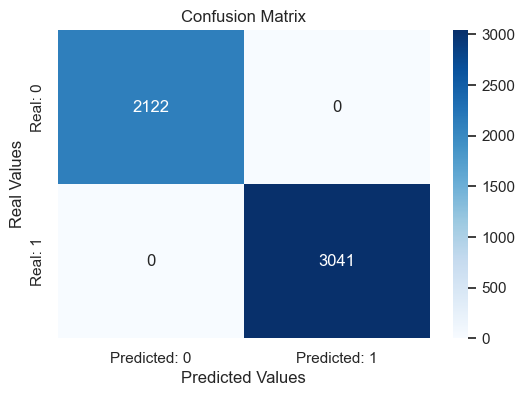

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

In [387]:
numeric_columns = main.select_dtypes(['int', 'float']).columns
numeric_columns

Index(['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

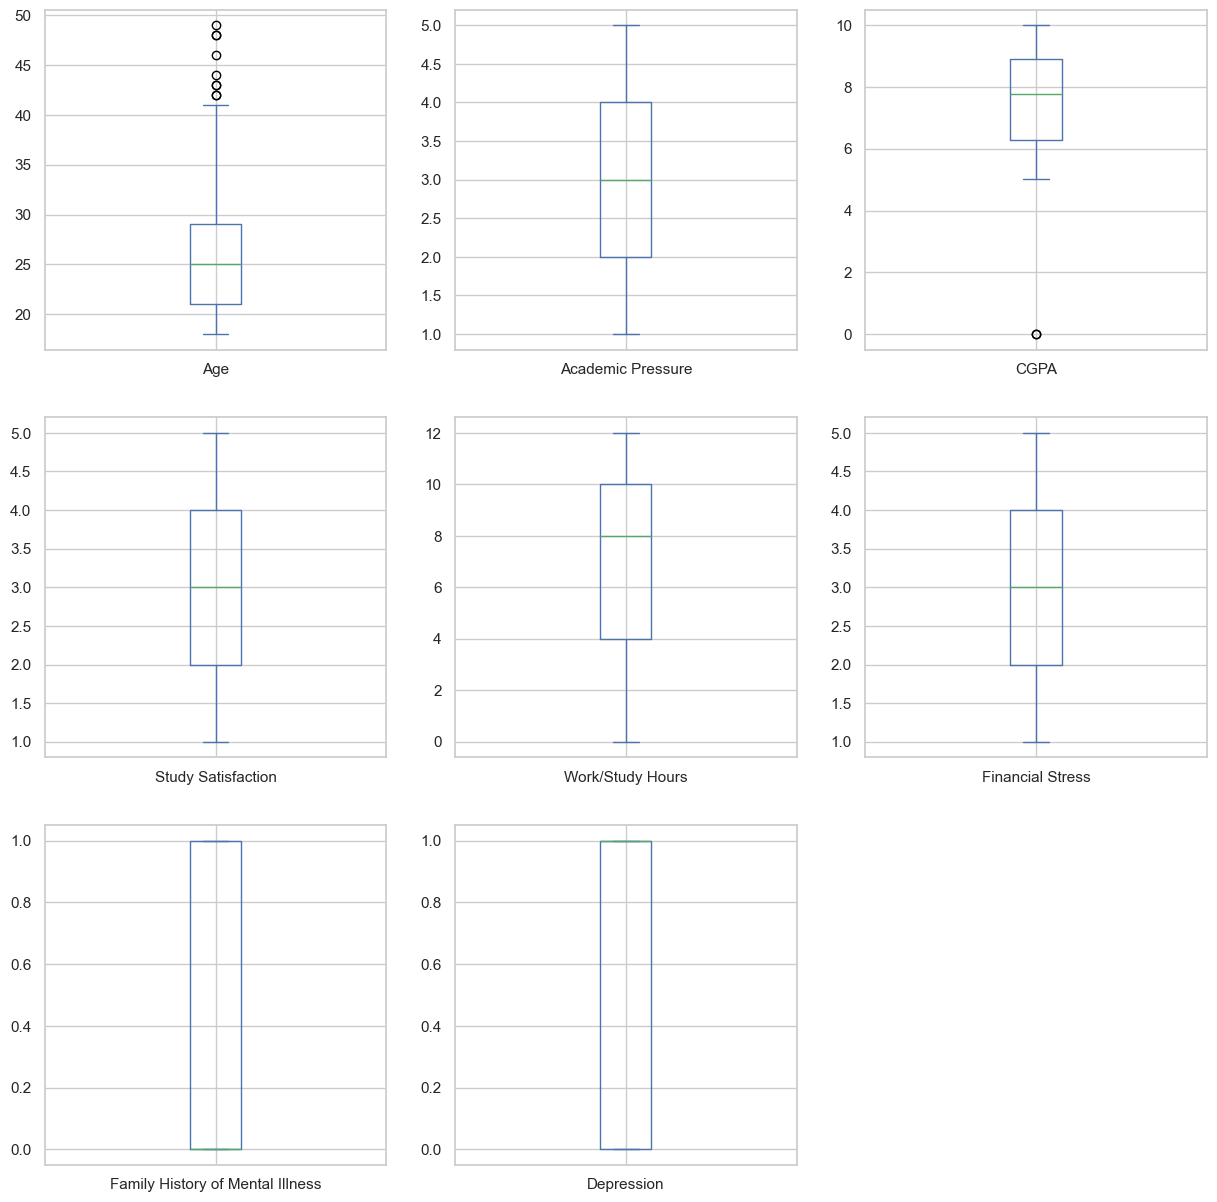

In [388]:
main[numeric_columns].plot(subplots=True, kind='box', layout=(3,3),figsize=(15,15))
plt.show()

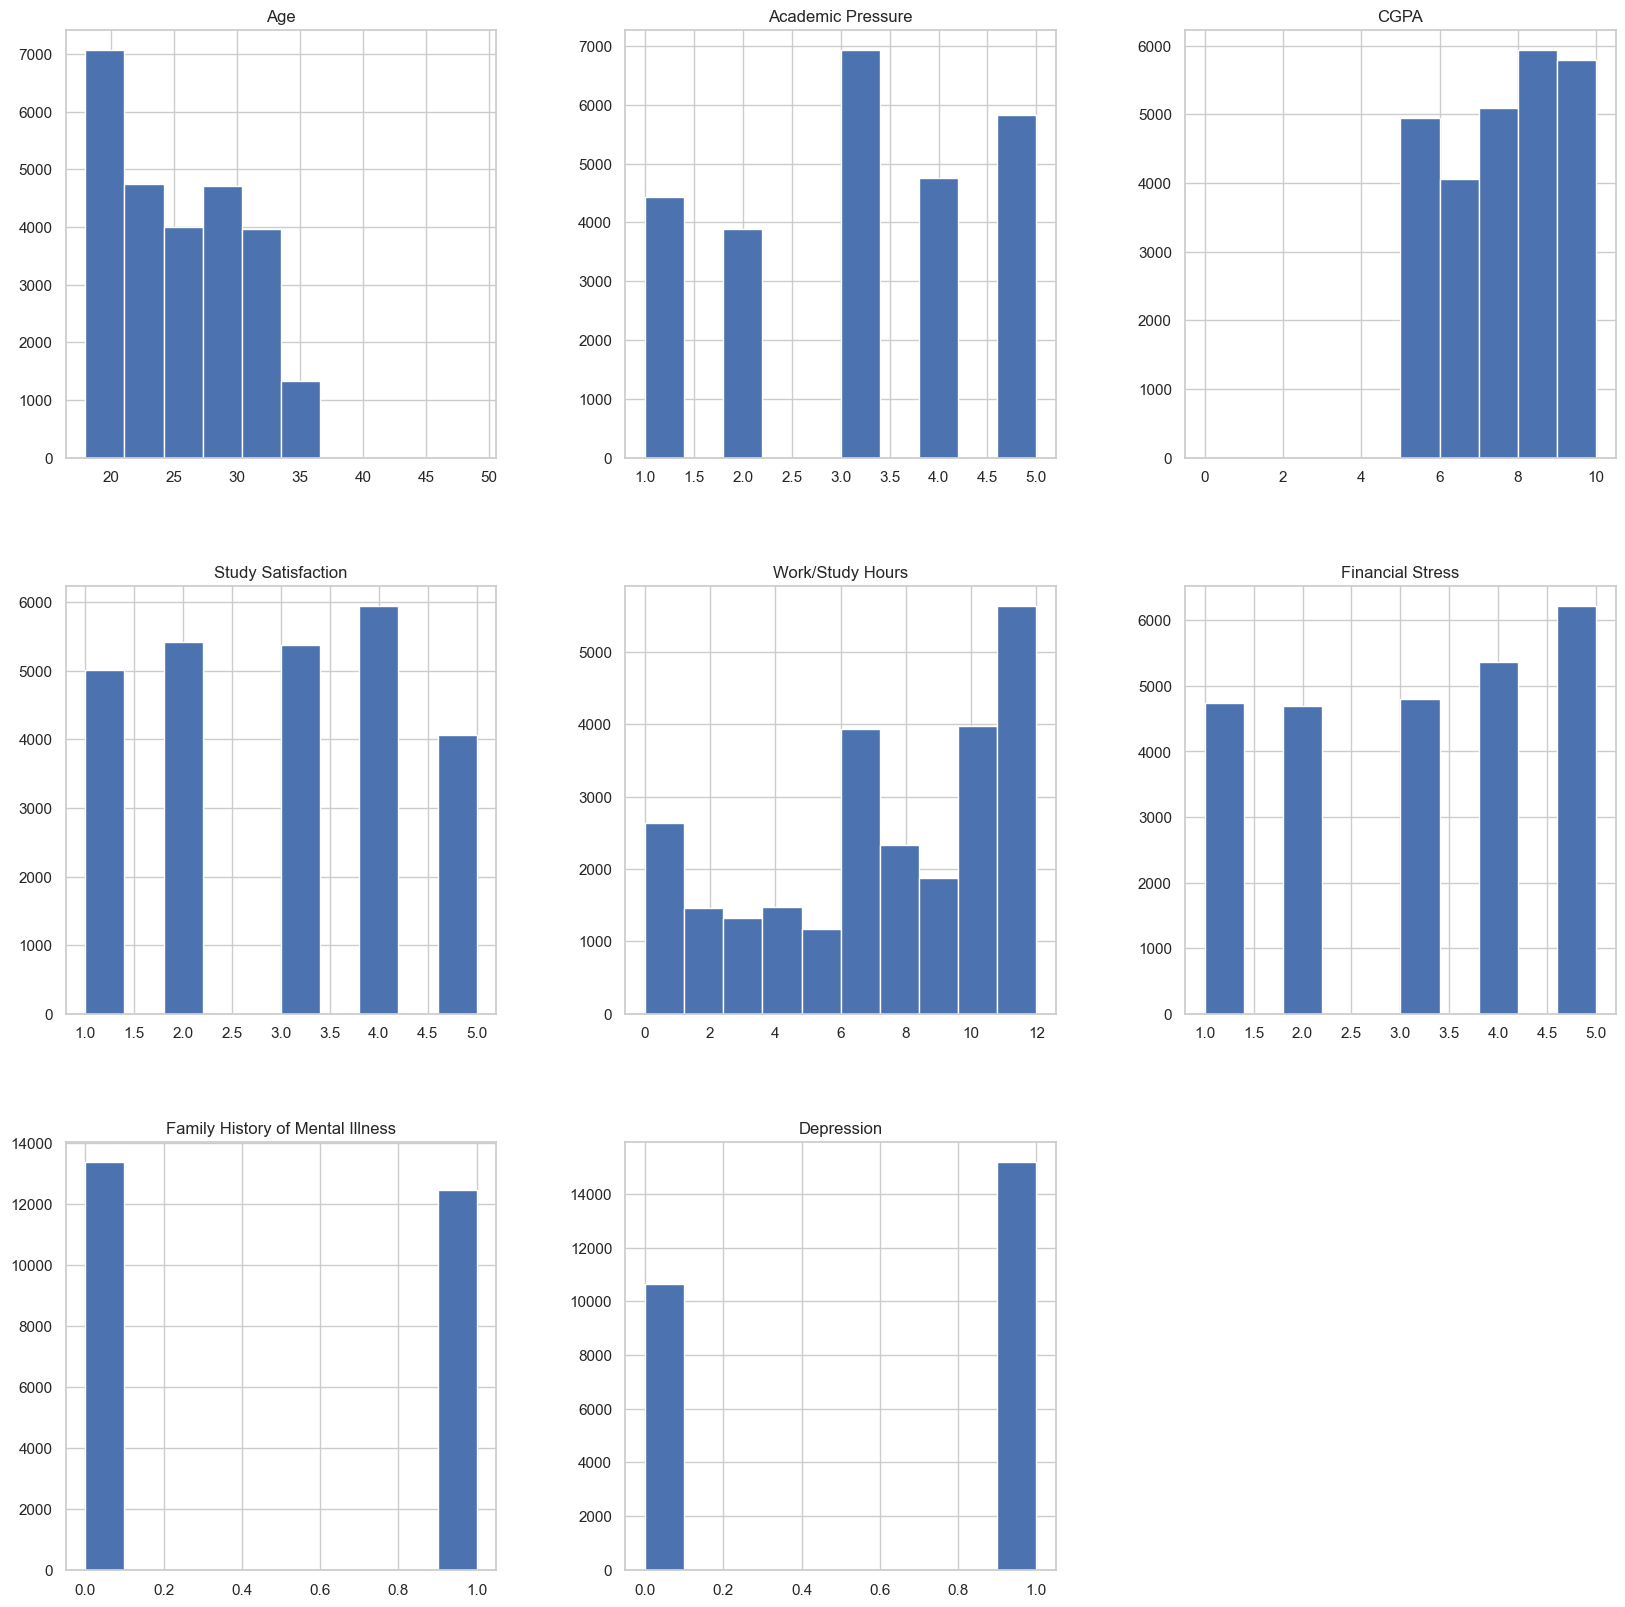

In [389]:
main.hist(figsize=(20,20), layout=(3,3), column = numeric_columns)
plt.show()

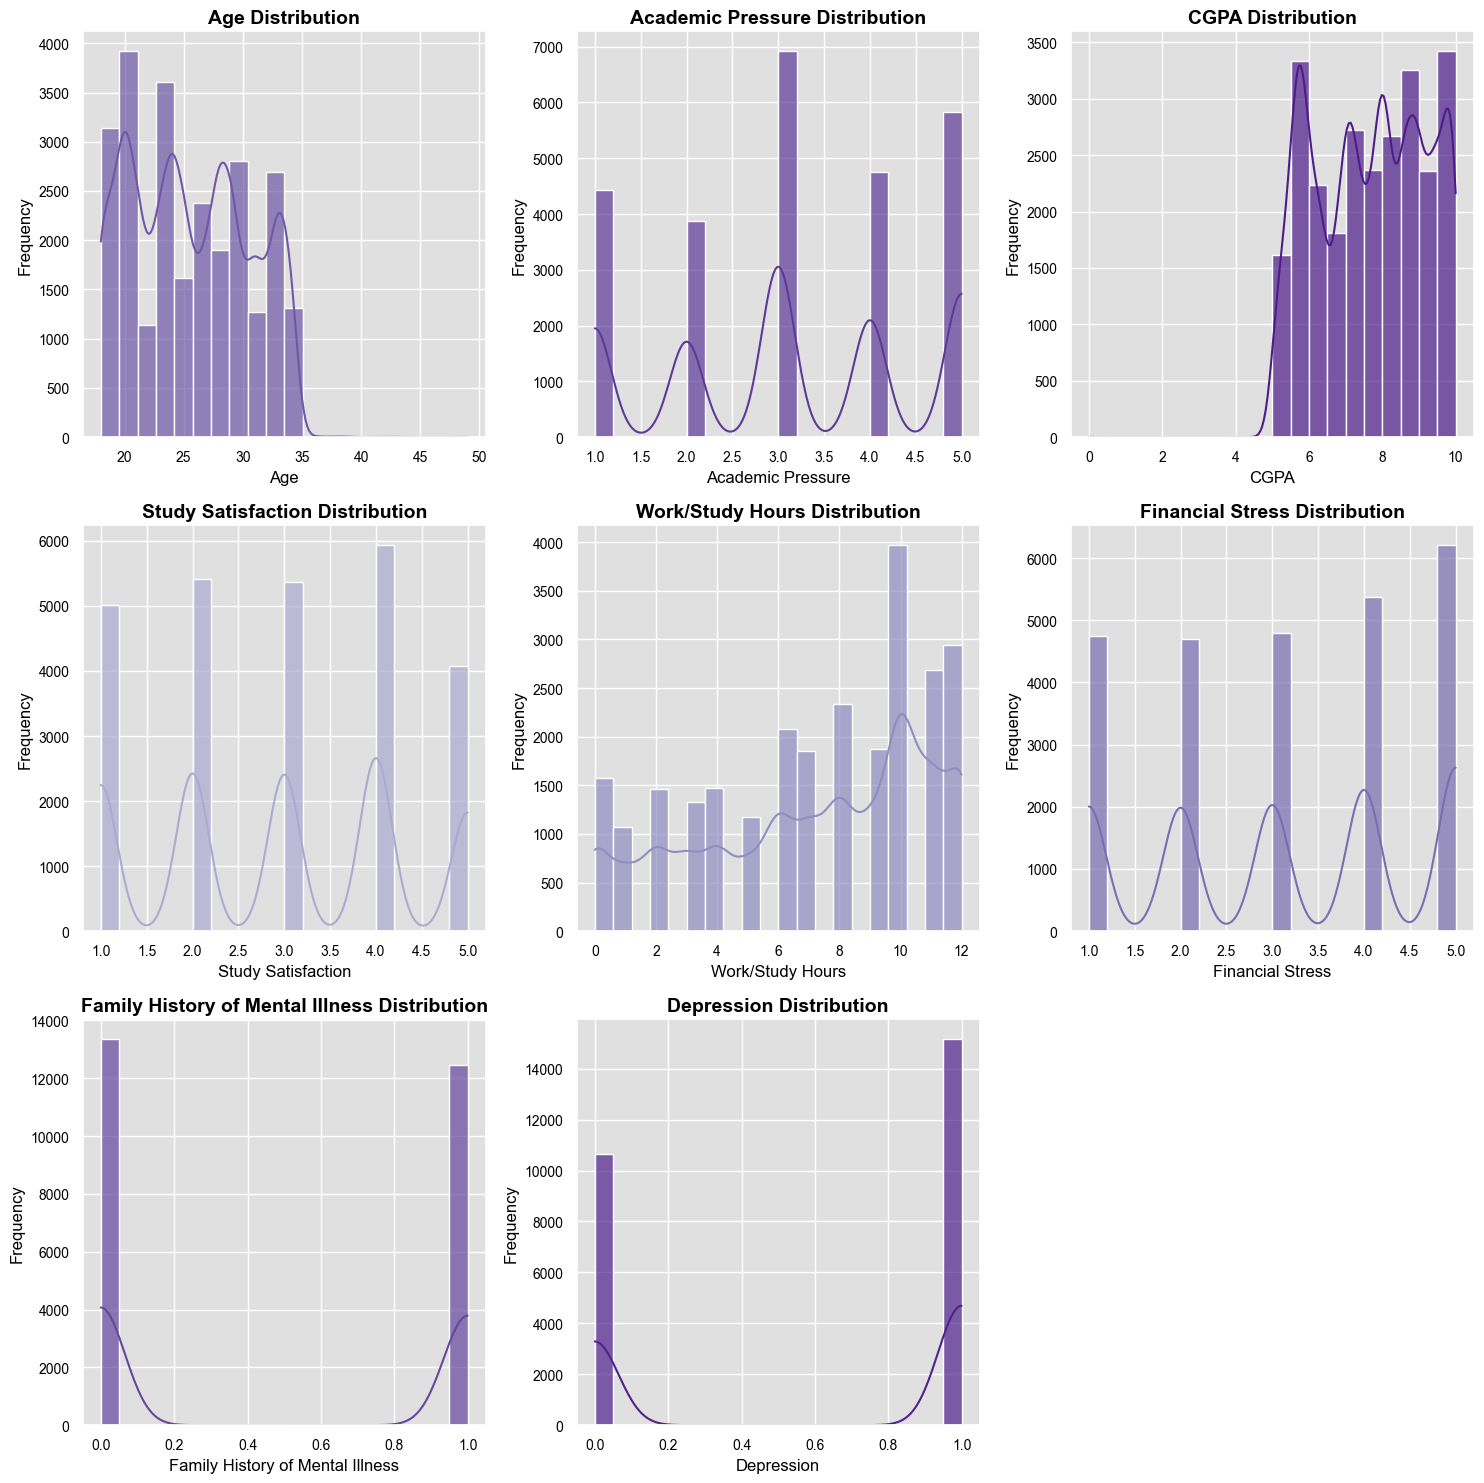

In [390]:
warnings.filterwarnings("ignore")
numerical_columns = main.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

# Set a seaborn style for the plot
sns.set(style="darkgrid")

num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

colors = sns.color_palette("Purples", num_cols)

dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors  

for i, col in enumerate(numerical_columns):
    sns.histplot(main[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

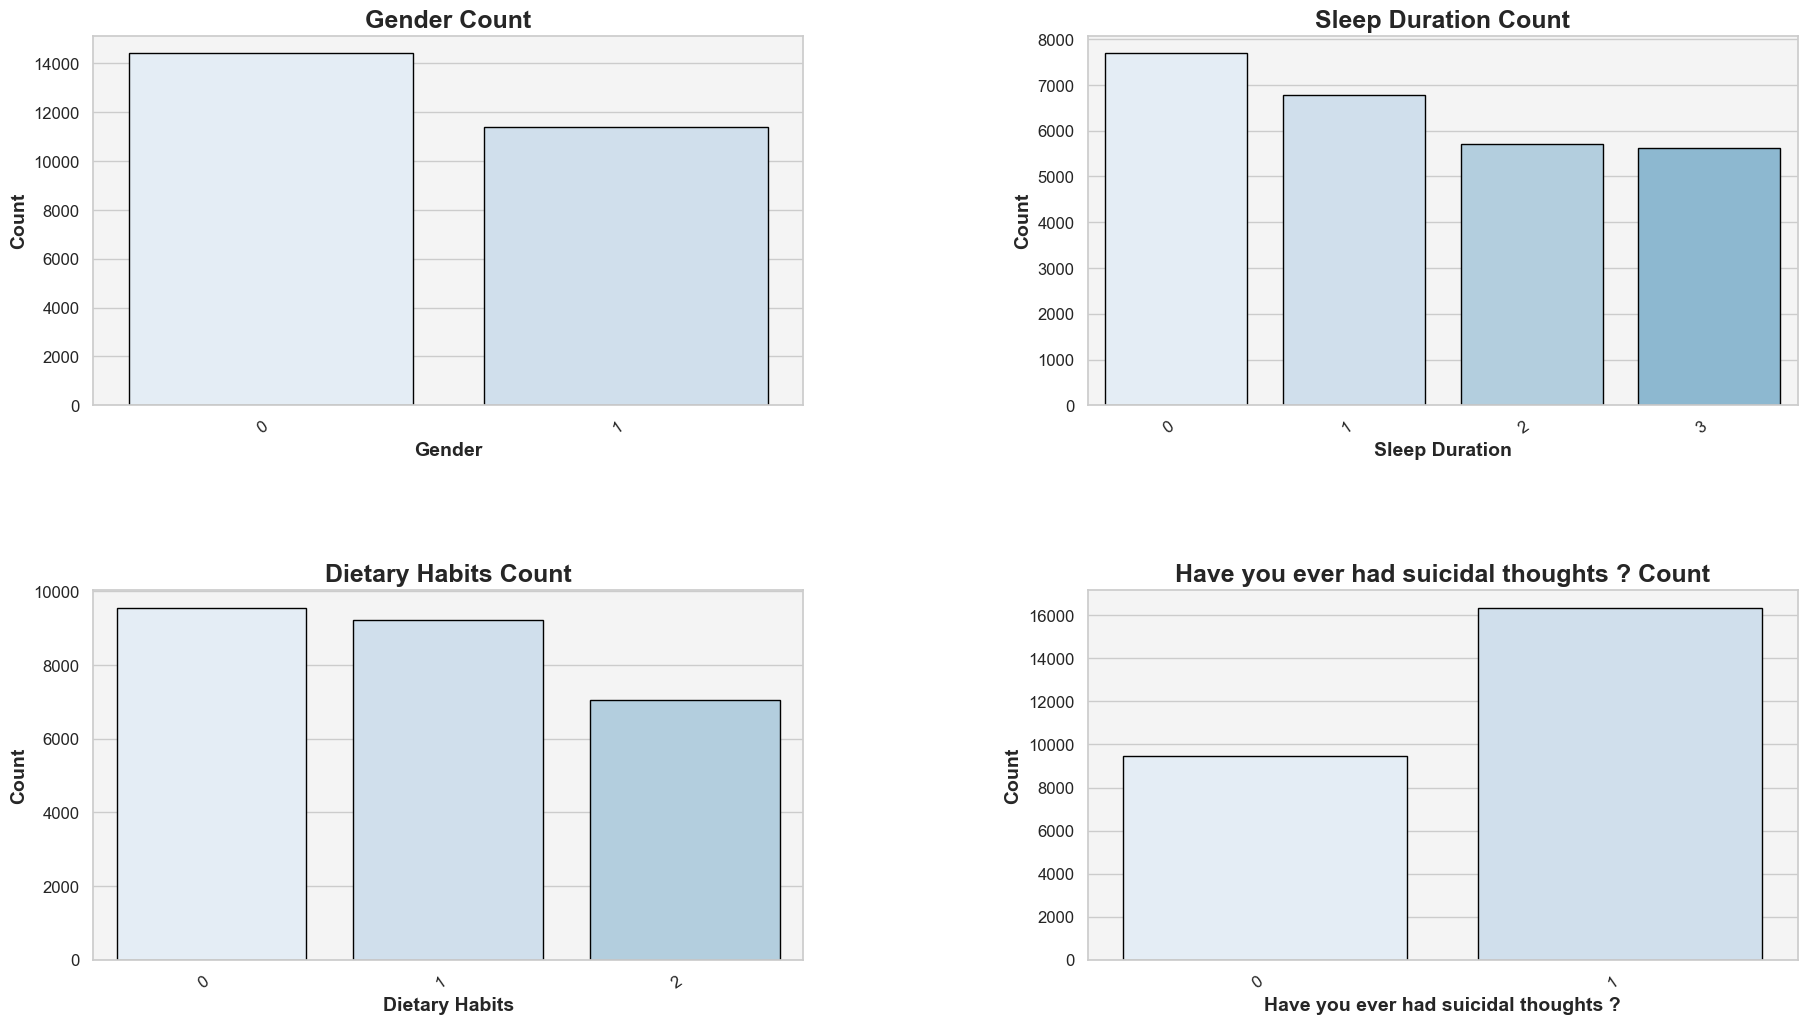

In [391]:
warnings.filterwarnings("ignore")

categorical_columns = main.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

sns.set(style="whitegrid")

num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  

colors = sns.color_palette("Blues", n_colors=8)

for i, col in enumerate(categorical_columns):
    if col.lower() == 'city':
        sns.countplot(data=main, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=main, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')

    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')


    for bar in axes[i].patches:
        bar.set_edgecolor('black')


    axes[i].set_facecolor('#f4f4f4')


for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])


plt.subplots_adjust(hspace=0.5, wspace=0.4)


plt.show

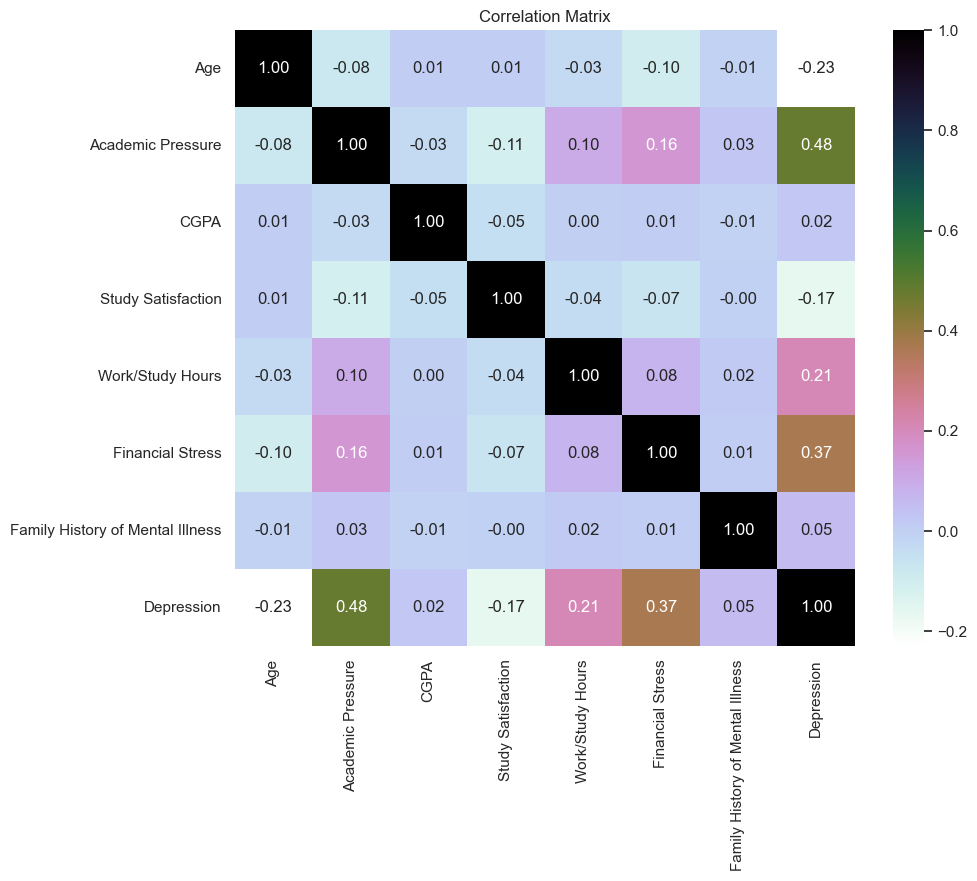

In [392]:
numerical_data = main.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = numerical_data.corr()  

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [393]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(main, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8964493221433183
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      3181
           1       0.90      0.93      0.91      4564

    accuracy                           0.90      7745
   macro avg       0.90      0.89      0.89      7745
weighted avg       0.90      0.90      0.90      7745



In [394]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8965784377017431
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      3181
           1       0.90      0.93      0.91      4564

    accuracy                           0.90      7745
   macro avg       0.90      0.89      0.89      7745
weighted avg       0.90      0.90      0.90      7745



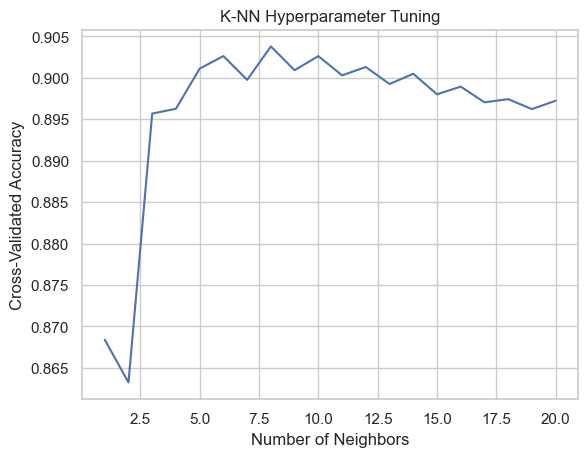

In [395]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 21) 
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, main, y, cv=5)  
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Hyperparameter Tuning')
plt.show()


In [396]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(main, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00      4564

    accuracy                           1.00      7745
   macro avg       1.00      1.00      1.00      7745
weighted avg       1.00      1.00      1.00      7745



In [397]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00      4564

    accuracy                           1.00      7745
   macro avg       1.00      1.00      1.00      7745
weighted avg       1.00      1.00      1.00      7745



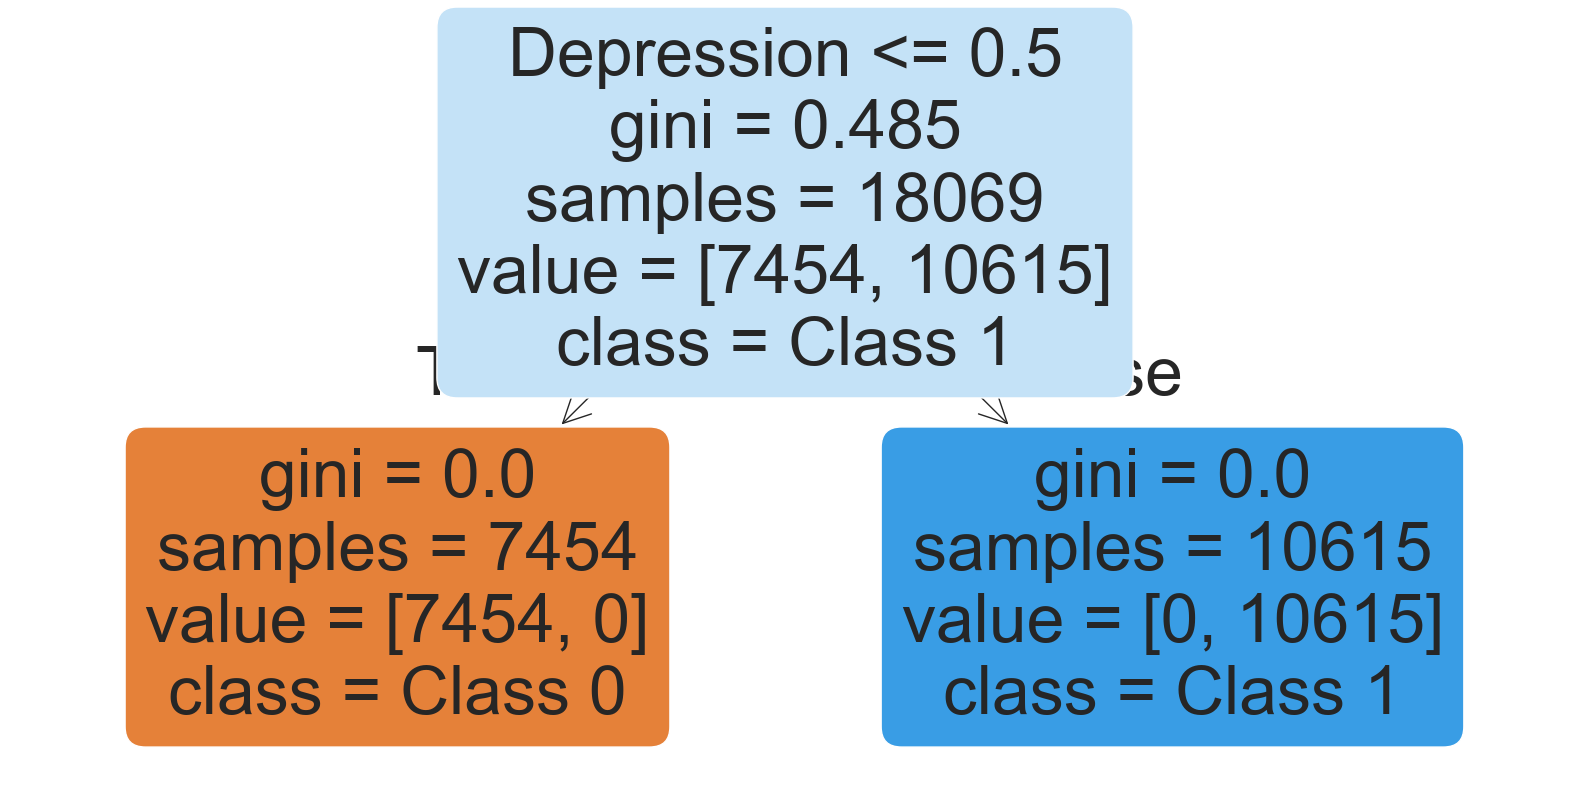

In [398]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=main.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()